1. 导入数据，对数据进行预处理

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv(r"./data/fraudulent.csv")
data

,contain_IP,is_long,is_tinyurl,contain_at,contain_double_slash,contain_dash,contain_subdomain,is_SSL,with_long_history,contain_icon,contain_ext_domain,contain_email_to,allow_right_click,contain_pop_up_window,contain_Iframe,has_DNSRecord,traffic,google_rank,y
0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,0.0,1.0,NaN,1.0,0.0,1
2,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0
3,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
4,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN,1.0,0.0,1.0,NaN,1.0,1.0,1.0,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10081,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,0.0,0
10082,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1
10083,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,0
10084,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,0.0,0


In [2]:
#用众数填充空值
for i in data.columns:
    data[i]=data[i].fillna(data[i].mode()[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   contain_IP             10086 non-null  float64
 1   is_long                10086 non-null  float64
 2   is_tinyurl             10086 non-null  float64
 3   contain_at             10086 non-null  float64
 4   contain_double_slash   10086 non-null  float64
 5   contain_dash           10086 non-null  float64
 6   contain_subdomain      10086 non-null  float64
 7   is_SSL                 10086 non-null  float64
 8   with_long_history      10086 non-null  float64
 9   contain_icon           10086 non-null  float64
 10  contain_ext_domain     10086 non-null  float64
 11  contain_email_to       10086 non-null  float64
 12  allow_right_click      10086 non-null  float64
 13  contain_pop_up_window  10086 non-null  float64
 14  contain_Iframe         10086 non-null  float64
 15  ha

In [3]:
#将数据输入与结果分开并转化为矩阵
Y = np.array(data['y'])
X = np.array(data.drop('y',axis=1))

2. 数据划分

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.7,random_state=1)

3. 建立二分类模型及评估

- 利用KNN建立二分类模型

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [7]:
import matplotlib.pyplot as plt
#不同邻居数对预测结果的影响
def getKnnAns(x:int):
    knn = KNeighborsClassifier(x)
    knn.fit(x_train,y_train)
    y_predict=knn.predict(x_test)
    return f1_score(y_test,y_predict)
d = dict()
for i in range(3,100):
    d[i]=getKnnAns(i)


邻居数：25，f1：0.8587135788894997


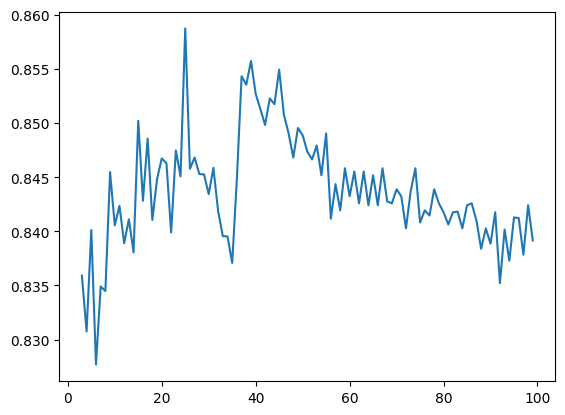

In [13]:
plt.plot(d.keys(),d.values())
x=0;y=0
for t in d.items():
    if y<t[1]:
        x=t[0];y=t[1]
print("邻居数：{}，f1：{}".format(x,y))

- 建立逻辑回归模型

In [10]:
from sklearn.linear_model import LogisticRegression
Logmode = LogisticRegression()
Logmode.fit(x_train,y_train)

LogisticRegression()

In [14]:
y_predict = Logmode.predict(x_test)
f1 = f1_score(y_test,y_predict)
print("逻辑回归f1 : {}".format(f1))

逻辑回归f1 : 0.8541893362350381


- 利用SVM模型

In [12]:
from sklearn.svm import SVC
mode = SVC()
mode.fit(x_train,y_train)

SVC()

In [15]:
y_predict = mode.predict(x_test)
f1 = f1_score(y_test,y_predict)
print("SVM f1 ：{}".format(f1))

SVM f1 ：0.8641039523551706


#### 通过上面的结果，发现SVM的f1值最接近1，达到0.8641039523551706，是这几个模型中效果最好的。